<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220804_%EC%95%99%EC%83%81%EB%B8%94%ED%95%99%EC%8A%B5%2C_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
lr_clf = LogisticRegression(max_iter = 3000)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft') # soft voting은 확률로 계산 hard는 다수결로 답이 나옴

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,test_size = 0.2, 
                                                    random_state = 156)
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474


In [14]:
for classifier in [lr_clf, knn_clf]:
  classifier.fit(X_train , y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


### Bagging
  - Bagging : 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.

## Random Forest
  - 배깅의 대표적인 알고리즘은 랜덤 포레스트이다.
  - 사이킷런의 랜덤 포레스트는 100개의 의사결정 나무 모델을 사용
  - 랜덤 포레스트는 여러개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습하고 모든 모델이 보팅을 통해 예측 결정을 한다.

  - 랜덤포레스트는 개별적인 분류기 기반 알고리즘은 결정트리지만, 개별 트리가 학습하는 데이터셋은 전체 데이터셋에서 일부가 중첩되게 샘플링된 데이터이다.
  - 여러개의 데이터 셋을 중첩되게 분리하는 것을 부트스트래핑(Bootstrapping) 방식이라고 한다.(나눈 데이터셋을 10개라치면 1112223334로 뽑아서 진행 할수 있다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')
# 데이터셋 로드
cancer = load_breast_cancer() 
# 데이터프레임에 저장
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

In [19]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋을 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤포레스트 정확도: 0.9561


#### GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝
  - n_estimators: 랜덤 포레스트에서 의사결정 트리의 개수 지정 디폴트는 100
  - 나머지 파라미터는 의사결정나무와 동일

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid =params , cv = 2, n_jobs = -1) 
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9451


#### 튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가 

In [30]:
# 위에 최적의 모델 하이퍼 파라미터를 대입해서 출력) -> refit = True 대신하는 느낌
rf_clf1 = RandomForestClassifier(n_estimators=100,
                                 max_depth = 6,
                                min_samples_leaf =  8,
                                min_samples_split = 8,
                                 random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9386


#### 개별 feature들의 중요도 시각화

In [31]:
rf_clf1.feature_importances_

array([3.54704796e-02, 1.05650455e-02, 7.73720655e-02, 4.81902511e-02,
       3.35341308e-03, 1.89438739e-03, 6.91248906e-02, 1.15823503e-01,
       4.25641127e-04, 1.96181341e-03, 2.02271243e-02, 4.33347649e-04,
       1.11232534e-02, 4.03908929e-02, 5.94374177e-04, 1.21089284e-03,
       6.96485399e-04, 9.66946855e-05, 7.05437672e-04, 1.98277832e-03,
       1.16192297e-01, 9.06628285e-03, 1.93184048e-01, 6.26219677e-02,
       6.03872870e-03, 1.11669332e-02, 2.58846942e-02, 1.20483743e-01,
       7.58639575e-03, 6.13213822e-03])

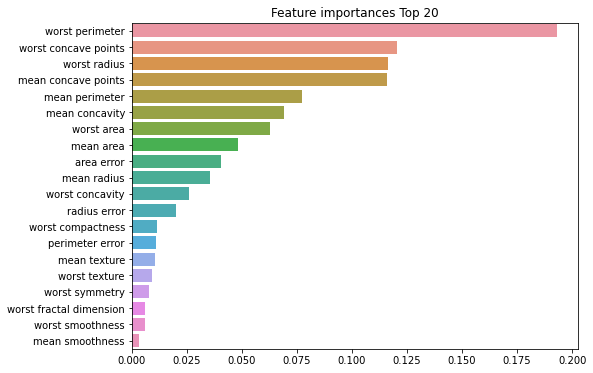

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### Boosting
  - AdaBoost : 여러개의 약한 학습기(깊이가 얕은 트리)를 순차적으로 학습-예측하면서, 잘못 예측한 데이터에 오차를 보완하는 방식으로 앙상블 하는 방법.

  1. 피처 데이터 셋에서 +dhk -를 기준의 왼쪽 오른쪽을 ㅗ나누려고 한다.
  2. 처음에 왼쪽에 두 +를 잡을 수 있게 분류 기준을 나눔. 그랬더니 오른쪽에 +가 세 개가 빠져나오게 되었다.(오류)
  3. 다음 라운드에

### GBM


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time # 컴퓨터 시간 모듈

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, 
                                                    random_state = 156)
# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time() # 시작시간을 저장

gb_clf = GradientBoostingClassifier(random_state =0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.1f}초'.format(time.time() - start_time)) # 소요시간 계산

GBM 정확도: 0.9561
GBM 수행시간 : 0.6초


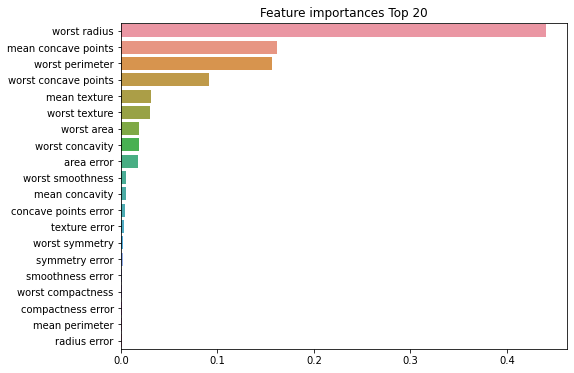

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

#### GBM 하이퍼 파라미터 튜닝
- 모델 파라미터

  - loss : 경사하강법에서 사용할 비용함수 지정
  - leaning_rate : 약한 학습히가 순차적으로 오류값보정하는데 적용하는 계수 0~1,  디폴트 0.1
  - n_estimators : 약한학습기의 개수 많을수록 성능은 높아지지만 오래걸림 디폴트 100
  - subsample : 학습에 사용하는 데이터 샘플링 비율 0~1 tjfwjdrksmd 디폴트는 1, 전체학습데이터 기반

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv  = GridSearchCV(gb_clf , param_grid = params, cv=2, verbose = 1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터 : 
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도:0.9517


In [39]:
scores_df = pd.DataFrame(grid_cv, cv_results)
scores_df[['params','mean_test_score']]

AttributeError: ignored

In [40]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9737


### 그밖의 부스팅 모델

#### LightGBM
  - lightGBM / XGBoost 파라미터 설명

In [42]:
# LightGBM의 파이썬 패키지인 lightbgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_clf = LGBMClassifier(n_estimators=400)

# LightGBM도 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)] #가중치 변할때마다 평가
lgbm_clf.fit(X_train, y_train, early_stopping_rounds =100, eval_metric ="logloss", # early_stopping_rounds -> 100번이상 같은 가중치면 최적이라보고 모델 정지
             eval_set = evals, verbose = True) # verbose 상세정보 출력
preds = lgbm_clf.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f},\
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [46]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 2 75]]
정확도 : 0.9474, 정밀도 : 0.9494, 재현률 : 0.9740,  F1 : 0.9615


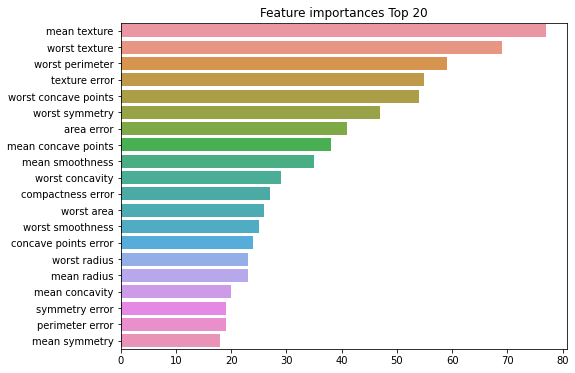

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### XGBoost(eXtra Gradeint Boost)

In [48]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier()

In [52]:
# 예측
# Predict를 수행하고 classification_report() 결과 출력하기
pred = xgb_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현률 : 0.9740,  F1 : 0.9677


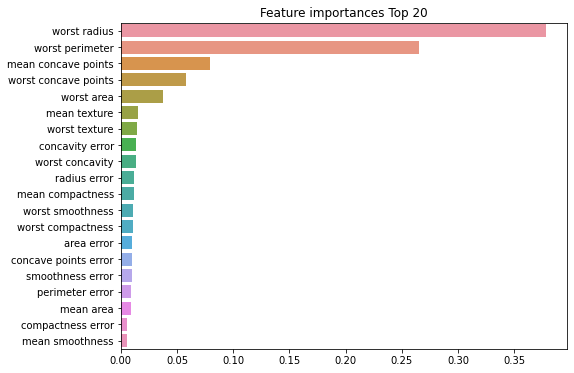

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3],
    'eta' : [0.1],
    'objdective' : ['binary:logistic'],
    'eval_metric' : ['logloss'],
    'early_stoppings' : [100]
}
num_rounds = 400

grid_cv  = GridSearchCV(xgb_clf , param_grid = params, cv=2, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=XGBClassifier(),
             param_grid={'early_stoppings': [100], 'eta': [0.1],
                         'eval_metric': ['logloss'], 'max_depth': [3],
                         'objdective': ['binary:logistic']},
             verbose=1)

In [55]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'early_stoppings': 100, 'eta': 0.1, 'eval_metric': 'logloss', 'max_depth': 3, 'objdective': 'binary:logistic'}
최고 예측 정확도:0.9539
